# Strava App vs Polar Watch

The idea is to check the differences in tracking between the app vs the watch.

In [73]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt

from pytz import timezone

In [74]:
def get_local_time(dt):
    tz = timezone('Asia/Singapore')
    return dt.astimezone(tz).strftime('%d/%m/%y %H:%M:%S')

def read_gpx_into_df(filename):
    with open(filename, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)
        
    points = []
    for segment in gpx.tracks[0].segments:
        for previous_point, point in zip(segment.points, segment.points[1:]):
            distance = point.distance_2d(previous_point)

            points.append({
                'time': get_local_time(point.time),
                'lat': point.latitude,
                'lng': point.longitude,
                'elevation': point.elevation,
                'distance': distance,
            })

    df = pd.DataFrame.from_records(points)
    
    df['time']  = pd.to_datetime(df['time'], format='%d/%m/%y %H:%M:%S')
    
    return df

In [75]:
def print_comparison(metric, polar_count, strava_count):
    print("\033[1m%s\033[0;0m: %.2f (Polar) %.2f (Strava)" % (
        metric, 
        polar_count, 
        strava_count
    )) 

def get_count_of_rows(df):
    return df.shape[0]

def get_duration(df):
    return (df.iloc[-1]['time'] - df.iloc[0]['time']).total_seconds() / 60.0

def get_distance(df):
    return df.distance.cumsum().iloc[-1] / 1000.0

In [76]:
polar_df = read_gpx_into_df('../data/Afternoon_Walk_Polar_Watch.gpx')
strava_df = read_gpx_into_df('../data/Afternoon_Walk_Strava_App.gpx')

In [77]:
print_comparison(
    'Record count', 
    get_count_of_rows(polar_df), 
    get_count_of_rows(strava_df)
)

Record count: 1373.00 (Polar) 1221.00 (Strava)


In [78]:
print_comparison(
    'Duration (minutes)', 
    get_duration(polar_df), 
    get_duration(strava_df)
)

Duration (minutes): 22.95 (Polar) 22.85 (Strava)


In [79]:
print_comparison(
    'Distance (km)', 
    get_distance(polar_df), 
    get_distance(strava_df)
)

Distance (km): 2.24 (Polar) 2.20 (Strava)


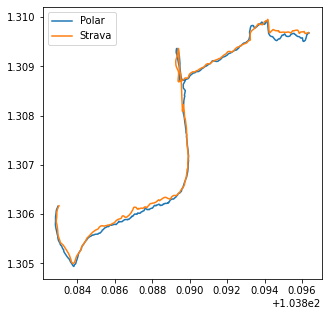

In [101]:
plt.figure(figsize=(5,5))
plt.plot(polar_df['lng'], polar_df['lat'], label='Polar')
plt.plot(strava_df['lng'], strava_df['lat'], label='Strava')
plt.legend()

## Debugging

In [63]:
polar_df.distance.describe()

count    1373.000000
mean        1.630895
std         0.760049
min         0.000000
25%         1.335485
50%         1.573892
75%         1.866011
max        14.737552
Name: distance, dtype: float64

In [64]:
strava_df.distance.describe()

count    1221.000000
mean        1.798510
std         0.789218
min         0.000000
25%         1.408056
50%         1.684562
75%         1.921186
max         8.533166
Name: distance, dtype: float64